In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm

import PLred.fit as fit
from PLred.imgrecon import locs2image

In [131]:
import importlib
importlib.reload(fit)

<module 'PLred.fit' from '/home/first/yjkim/PLred/PLred/fit.py'>

## Making the matrix

In [67]:
model_file = '../example_model_couplingmap/betcmi_20240917_polymodel.fits'
image_ngrid = 32
image_fov = 20 # mas
n_trim = 4

fitter = fit.PLMapFit(model_file = model_file, image_ngrid = image_ngrid, 
                      image_fov = image_fov, n_trim = n_trim)

loading model


In [117]:
specind = 50
fibinds = np.arange(38) #np.arange(38) # np.arange(25,30) #

fitter.prepare_data(specind, fibinds)
fitter.make_matrix(specind, fibinds)


1024it [00:23, 43.18it/s]

all the fiber indices are used. saving the matrix to mat_full


In [82]:
fitter.save_matrix_to_file('matrix_specind%d.fits' % specind)

Matrix saved to  matrix_specind90.fits


Once the matrix is saved, this can be loaded without having to compute again

## Loading the matrix and doing image reconstruction

In [156]:
specind = 106

fitter2 = fit.PLMapFit(matrix_file = 'matrices/matrix_specind%d.fits' % specind)

loading model
Matrix loaded from  matrices/matrix_specind106.fits specind 106


In [157]:

fibinds = np.arange(38)

fitter2.prepare_data(fibinds)
fitter2.subsample_matrix(fibinds)

preparing data for specind 106


In [161]:
ini_temp = 1e3 #1
tau = 3e4
gamma = 10064 # 5000
n_element = 100 #50
target_chi2 = 0.5
fitter2.store_hyperparams(ini_temp, tau, gamma, n_element, target_chi2)

100%|██████████| 1000/1000 [00:05<00:00, 182.43it/s]


Done
Final chi2 0.693090804423849


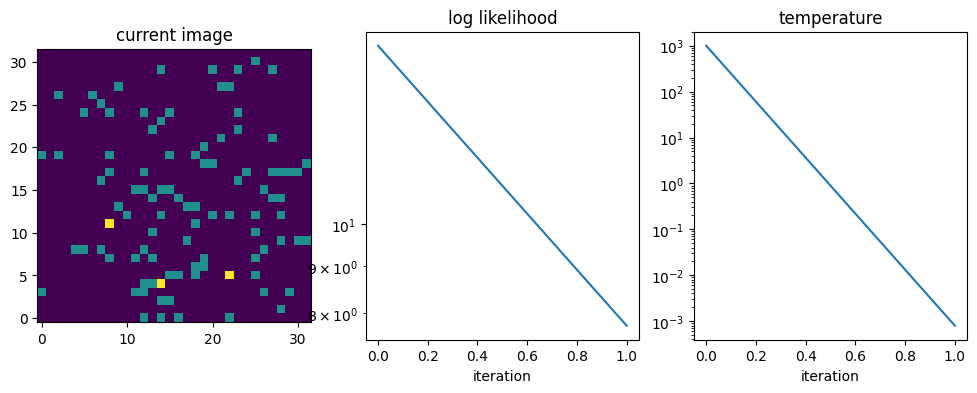

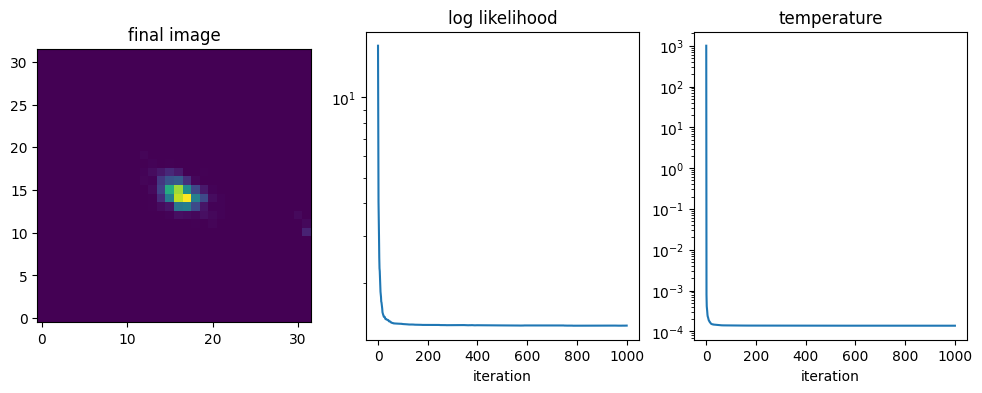

In [162]:
# fitter.make_matrix(specind, fibinds)

rc = fitter2.run(niter = 1000, radius = 20, plot_every = 5000)

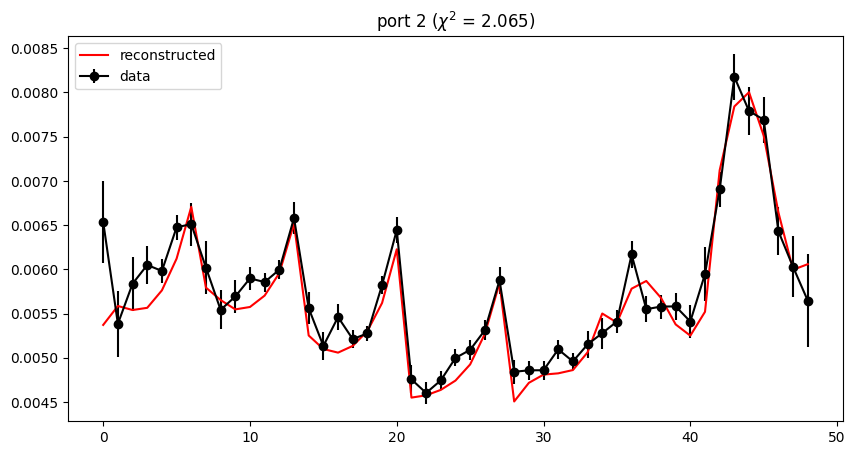

In [166]:
fitter2.plot_1d(2)


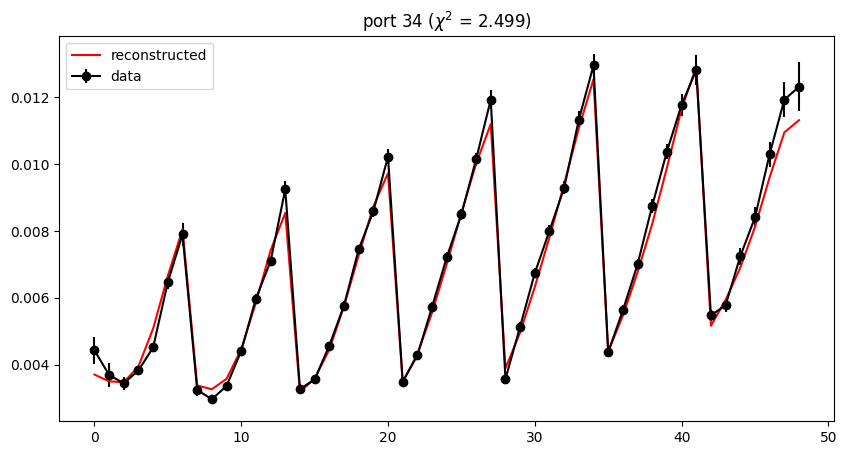

In [160]:
fitter2.plot_1d(34)


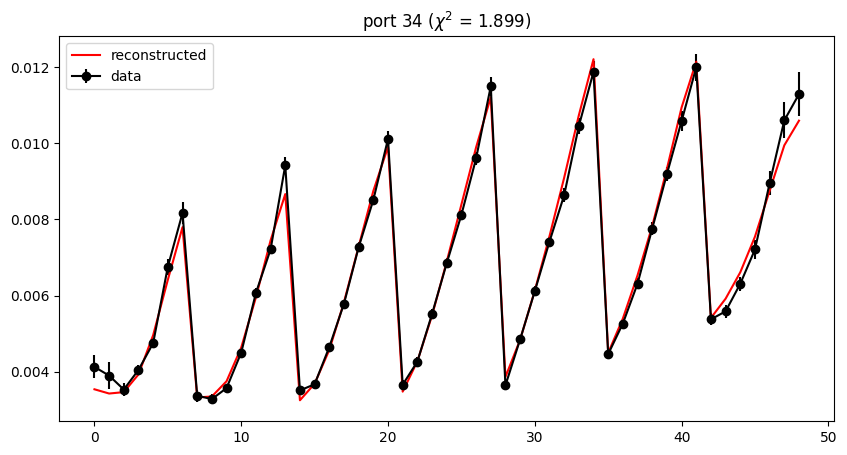

In [97]:
fitter2.plot_1d(34)

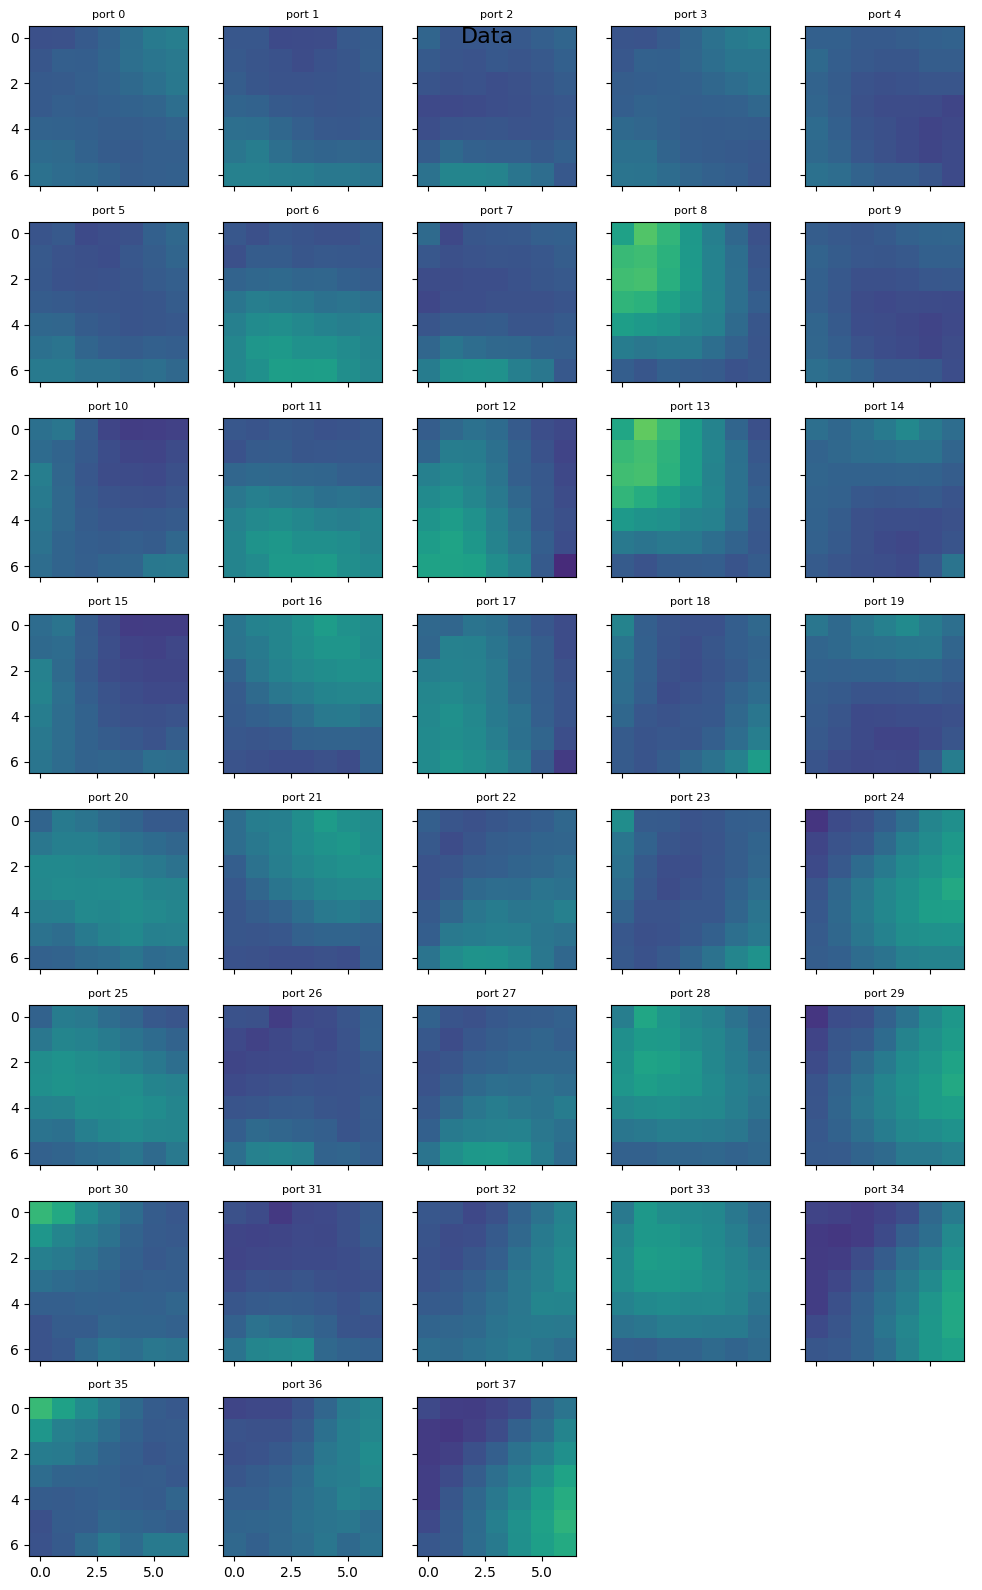

In [44]:
fitter2.plot_data()

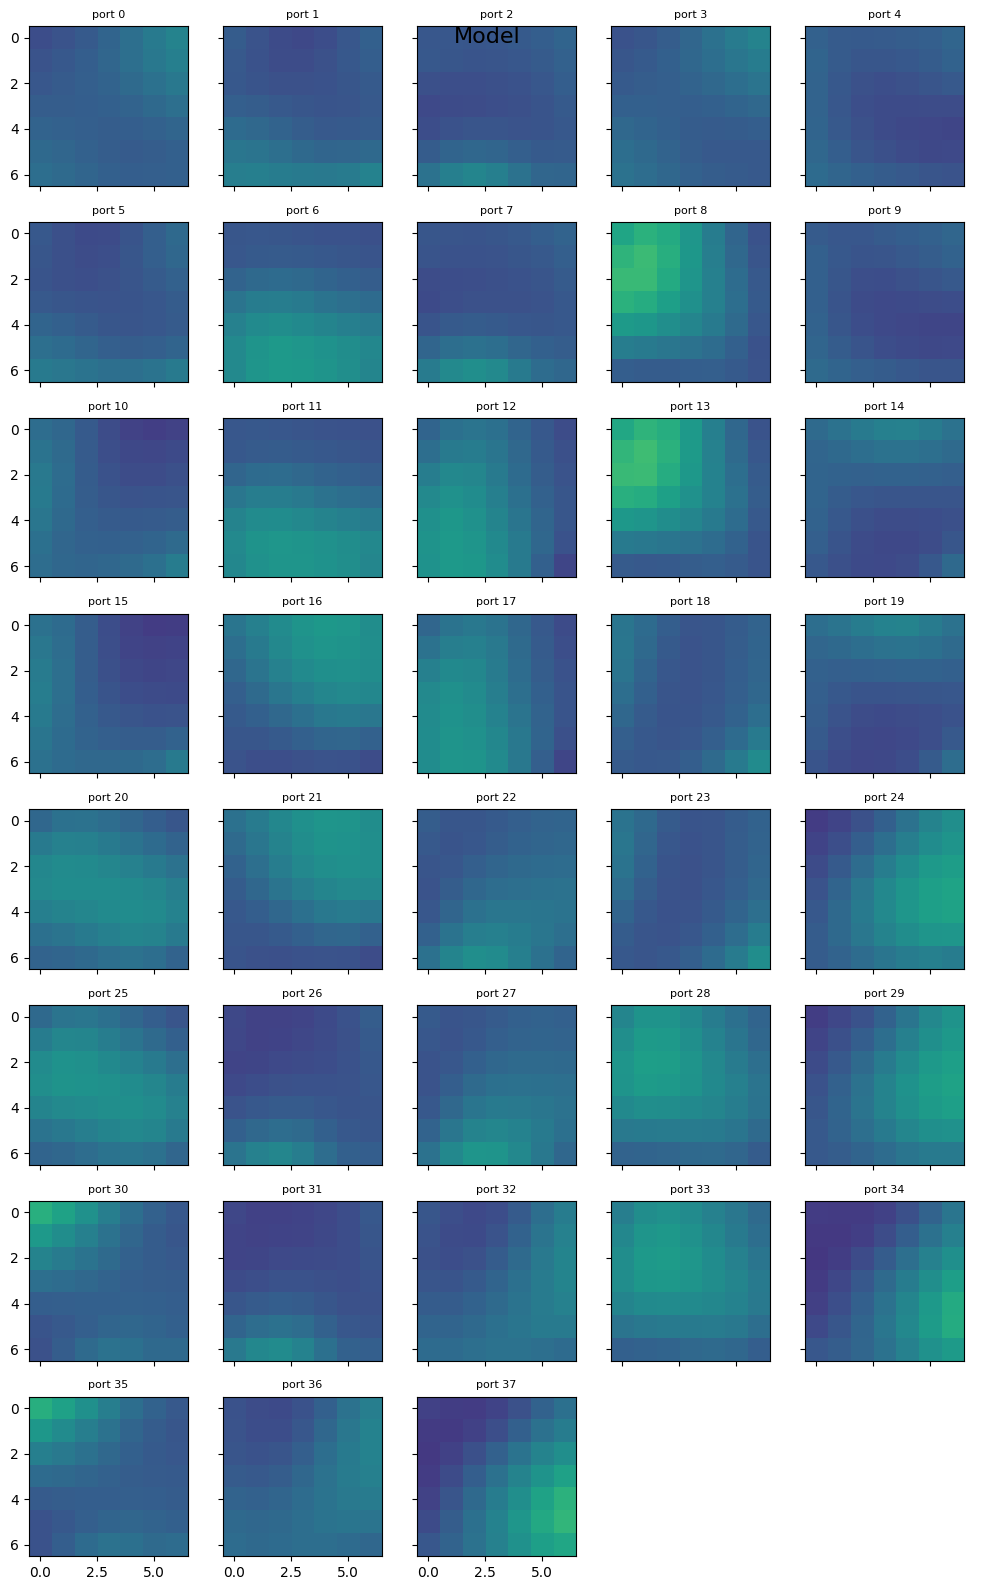

In [45]:
fitter2.plot_model()

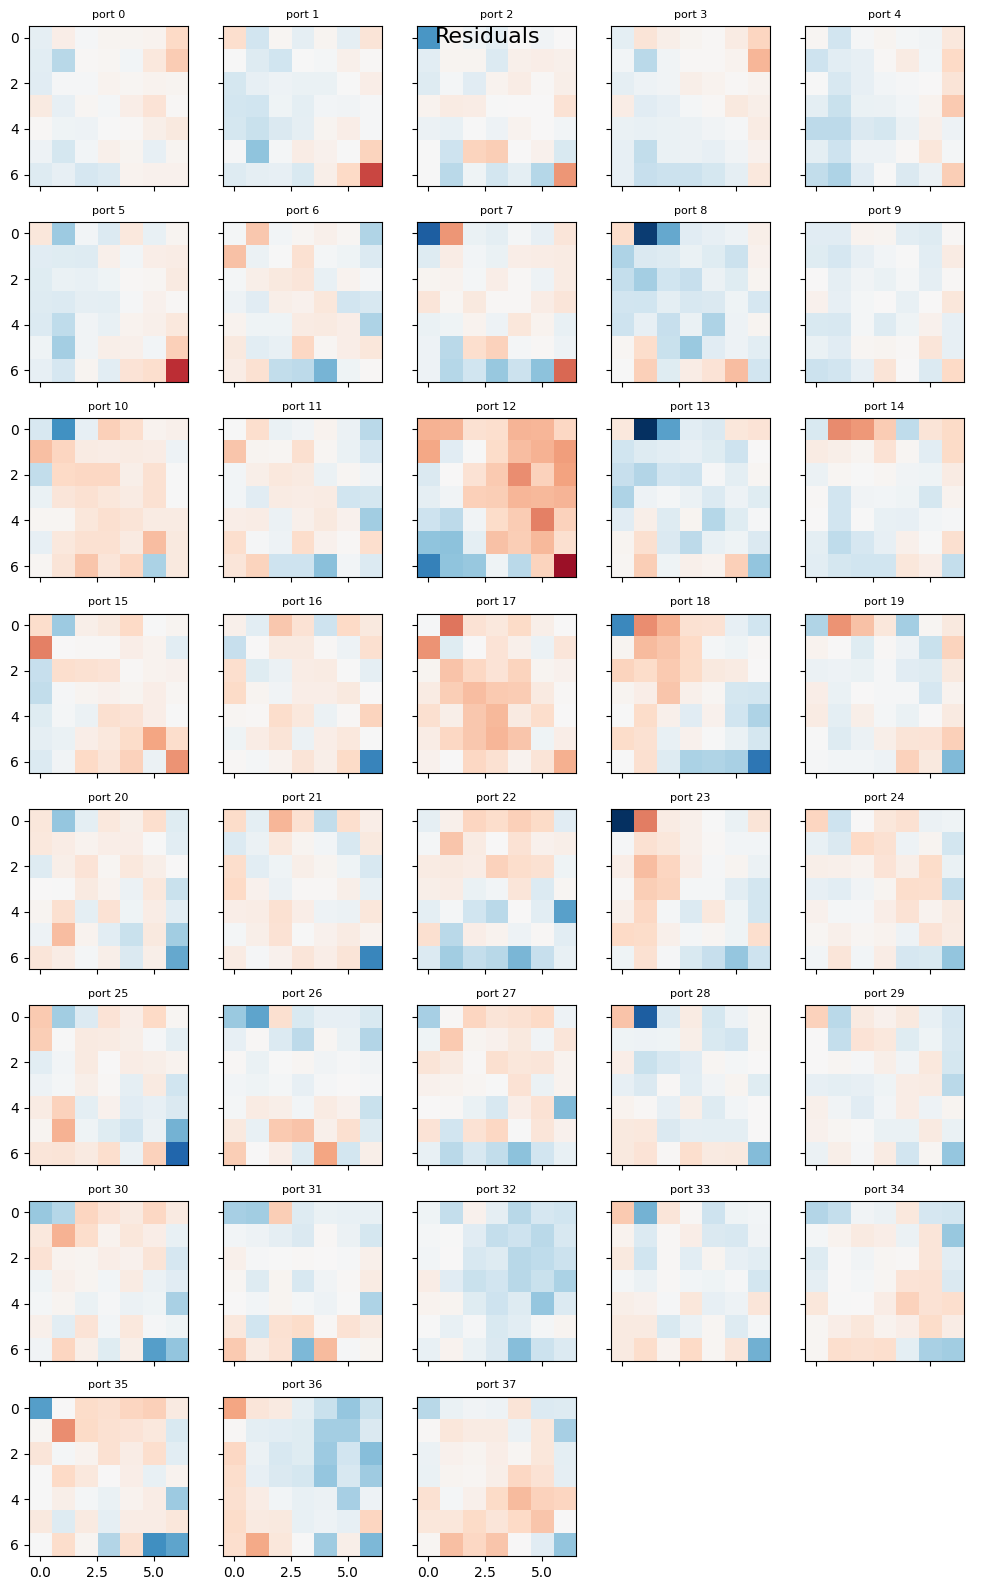

In [50]:
fitter2.plot_residuals()

In [58]:
np.shape(fitter2.rc.data.reshape((-1, 49)))

(38, 49)

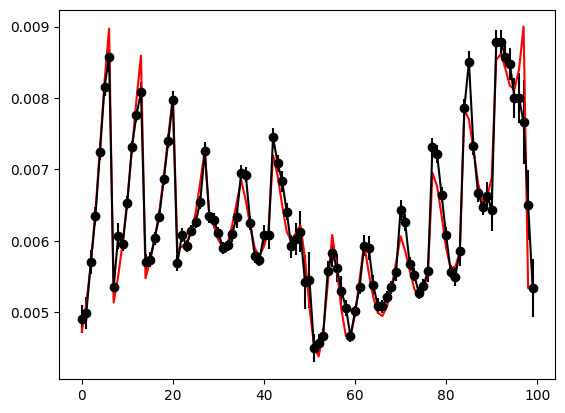

In [56]:
plt.errorbar(np.arange(100), fitter2.rc.data[:100], yerr = fitter2.rc.data_err[:100], fmt = 'o-', color='black')
plt.plot(np.arange(100), fitter2.rc.final_vec[:100], color='red')

In [51]:
fitter2.rc.current_ll

np.float64(1.2736744424526896)

In [36]:

fibinds = np.arange(38)
fibinds = np.delete(fibinds, [12,25])

fitter2.prepare_data(fibinds)
fitter2.subsample_matrix(fibinds)

preparing data for specind 80


100%|██████████| 1000/1000 [00:05<00:00, 186.00it/s]


Done


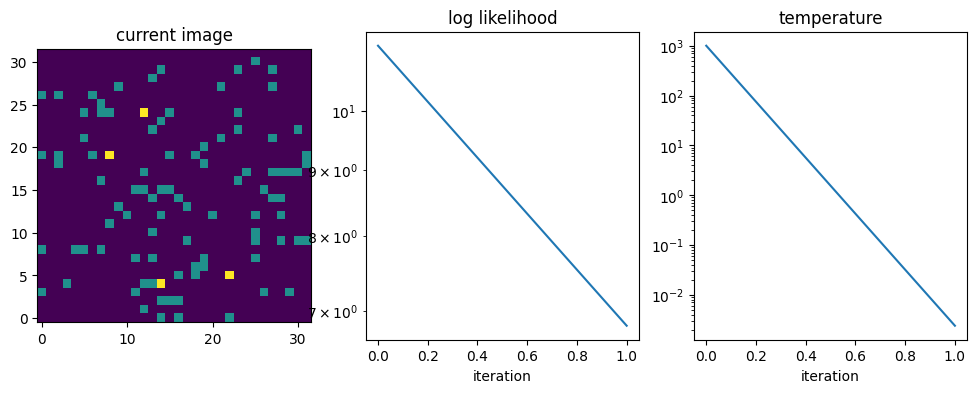

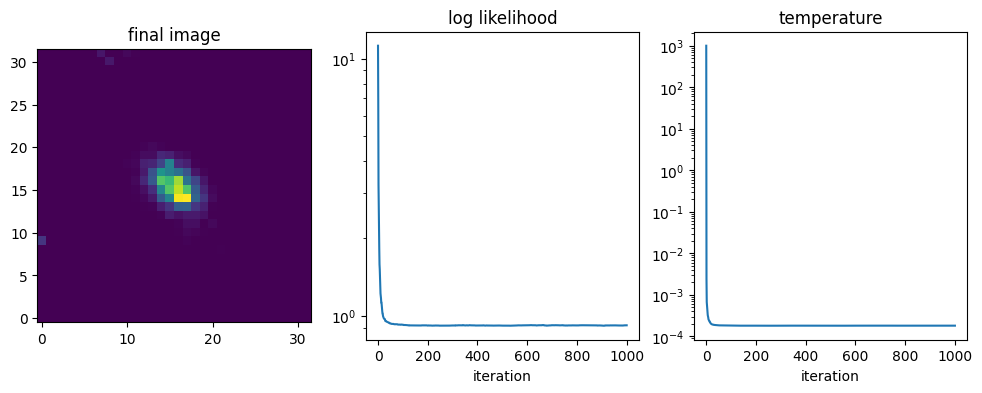

In [37]:
rc = fitter2.run(niter = 1000, radius = 20, plot_every = 5000)


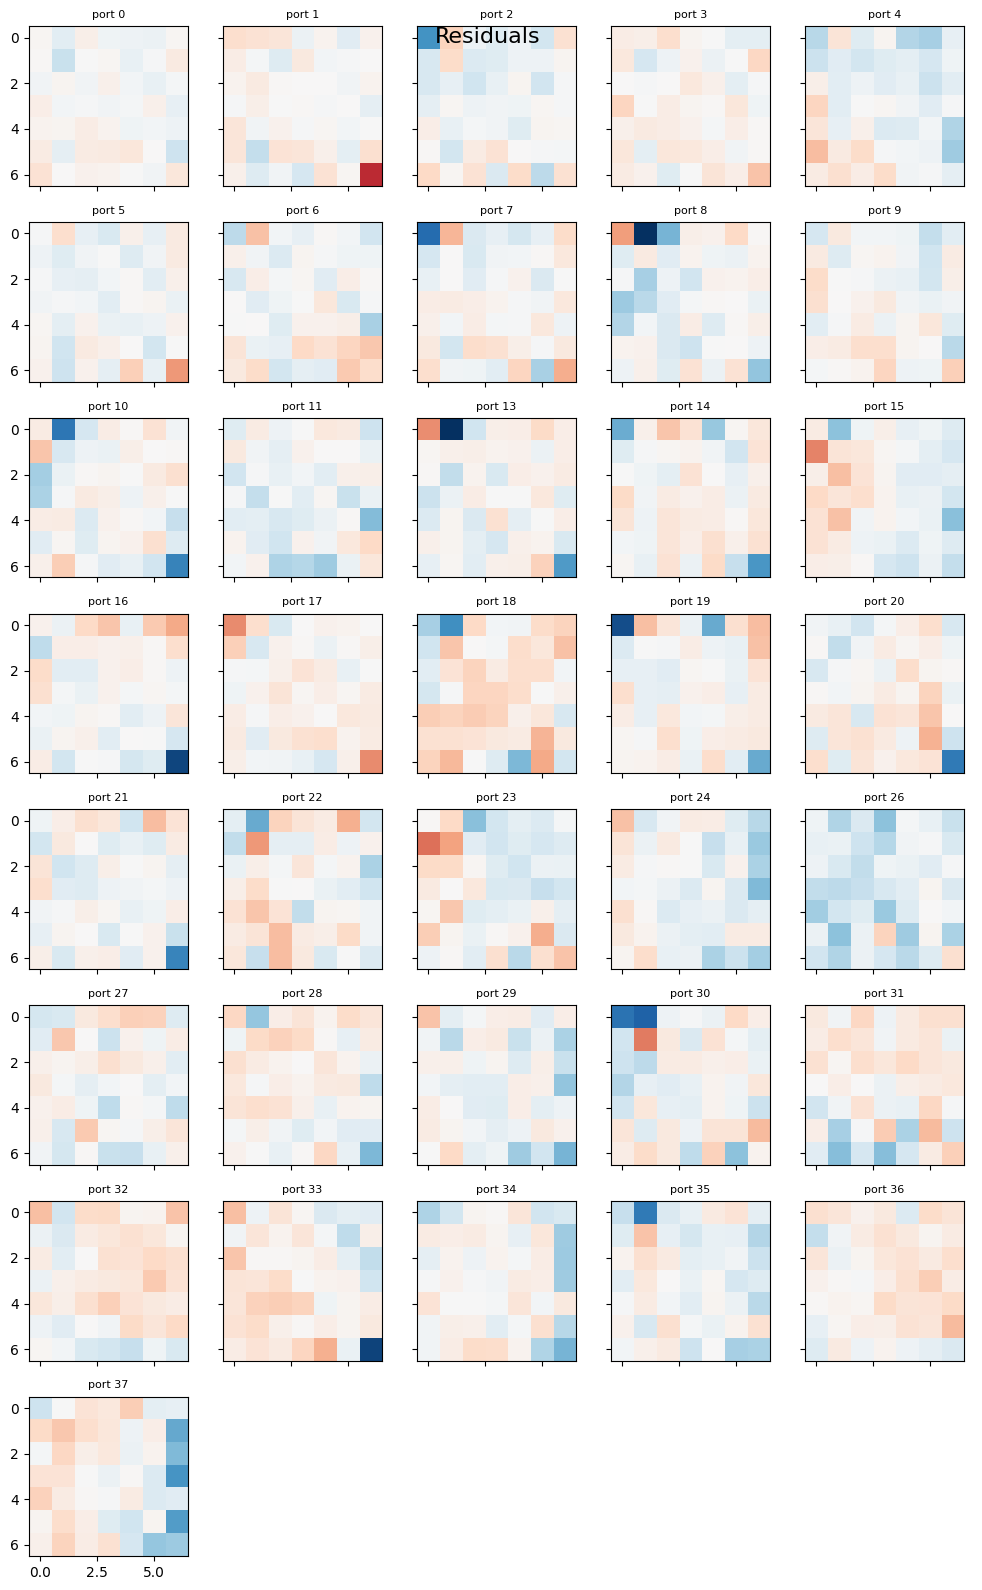

In [38]:
fitter2.plot_residuals()


In [39]:
fitter2.rc.current_ll

np.float64(0.9179589928024905)

In [188]:
fitter2.mapmodel.model_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   55                                                  
NAXIS2  =                  200                                                  
NAXIS3  =                   38                                                  
EXTEND  =                    T                                                  
XMIN    =  -24.299999999999997                                                  
XMAX    =   24.299999999999997                                                  
MAP_N   =                   15                                                  
NPOLY1  =                    9                                                  
NPOLY2  =                    9                                                  
WEIGHTED=                   

In [156]:

def plot_maps(maps, titles=None, texts=None, origin='upper', vmin=None, vmax=None):

    n_maps = len(maps)
    ncols = min(5, n_maps)
    nrows = (n_maps + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.5, nrows*1.5), sharex=True, sharey=True)
    
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < n_maps:
            im = ax.imshow(maps[i], origin=origin, vmin=vmin, vmax=vmax)
            if titles is not None:
                ax.set_title(titles[i], fontsize=8)
            # if texts is not None:
            #     ax.text(0.5, 0.5, texts[i], transform=ax.transAxes, fontsize=12, color='white', ha='center')
        else:
            ax.axis('off')

    # fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    plt.tight_layout()
    plt.show()

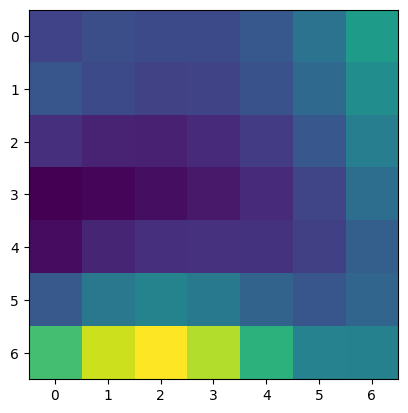

In [157]:
plt.imshow(np.reshape(rc.current_vec, shape= (-1,49))[2,:].reshape((7,7)))

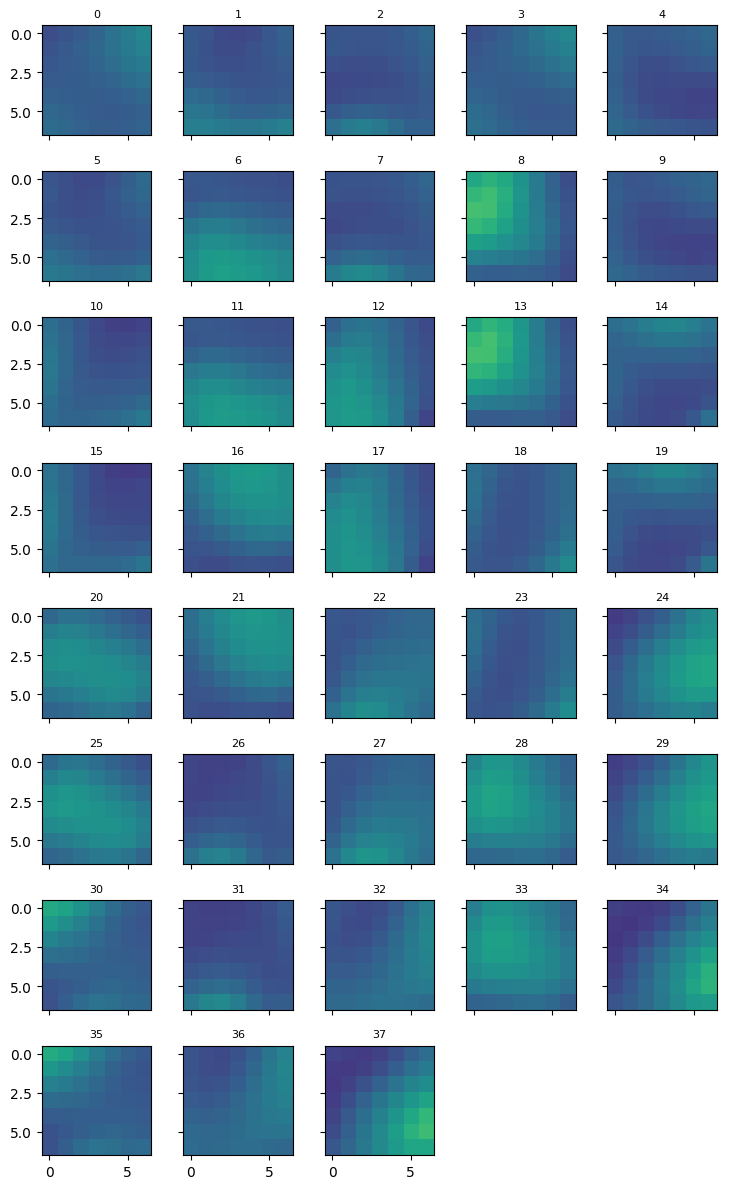

In [160]:
plot_maps(np.reshape(rc.current_vec, shape= (-1,7,7)),
titles = np.arange(38),
vmin=0, vmax=0.02)

In [161]:
np.shape(rc.data)

(1862,)

In [163]:
fitter2.mapmodel.image_ngrid

32

In [172]:
np.shape(fitter2.mapmodel.normdata)[0] - 2*fitter2.n_trim

7

In [175]:
np.arange(15)[0:-0]

array([], dtype=int64)

In [171]:
fitter2.n_trim

4

In [178]:
len(fitter2.mapmodel.pos_mas)

15

In [167]:
fitter2.ngrid

AttributeError: 'PLMapFit' object has no attribute 'ngrid'

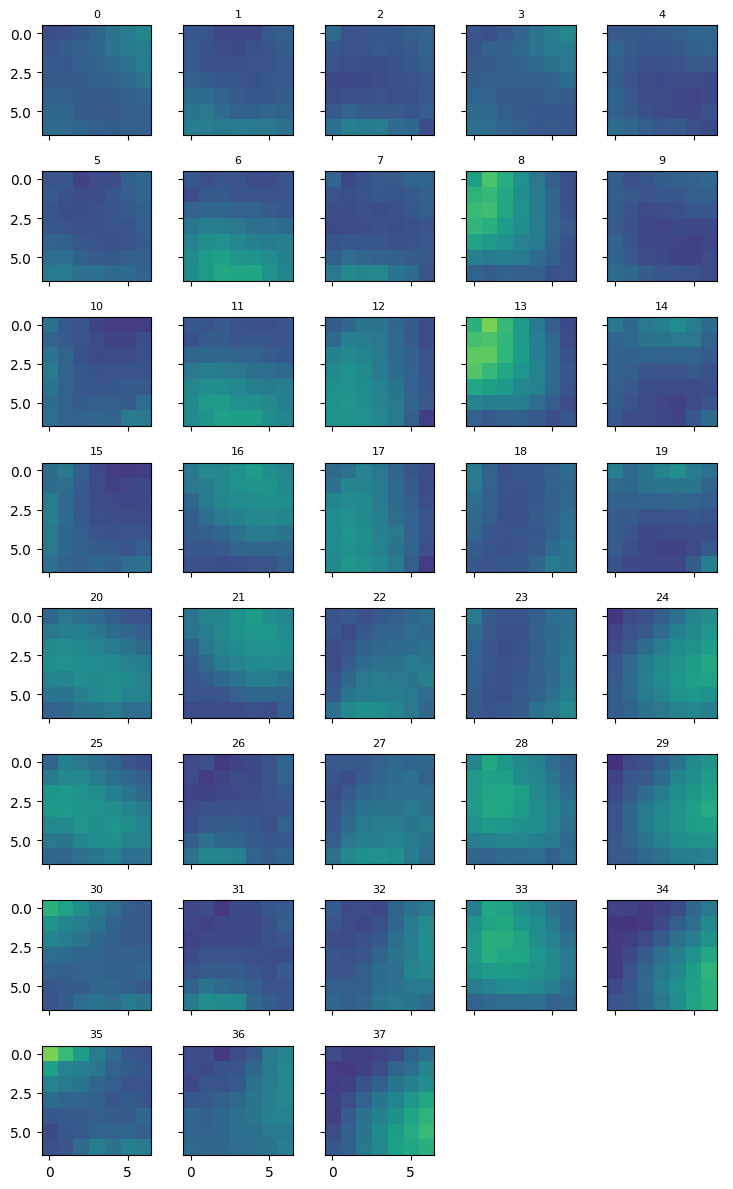

In [162]:
plot_maps(np.reshape(rc.data, shape= (-1,7,7)),
titles = np.arange(38),
vmin=0, vmax=0.02)

In [140]:
rc.current_ll

np.float64(1.0746716283008582)

In [110]:
rc.current_ll

np.float64(0.9050525267900401)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:08<00:00, 223.01it/s]


Done


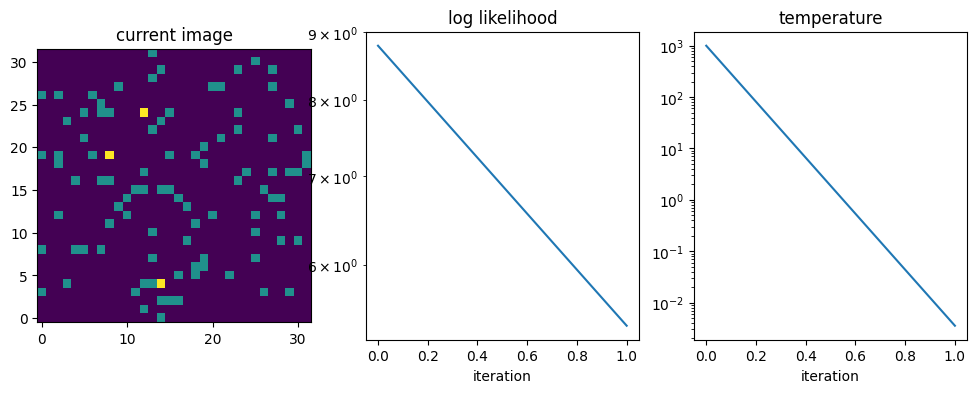

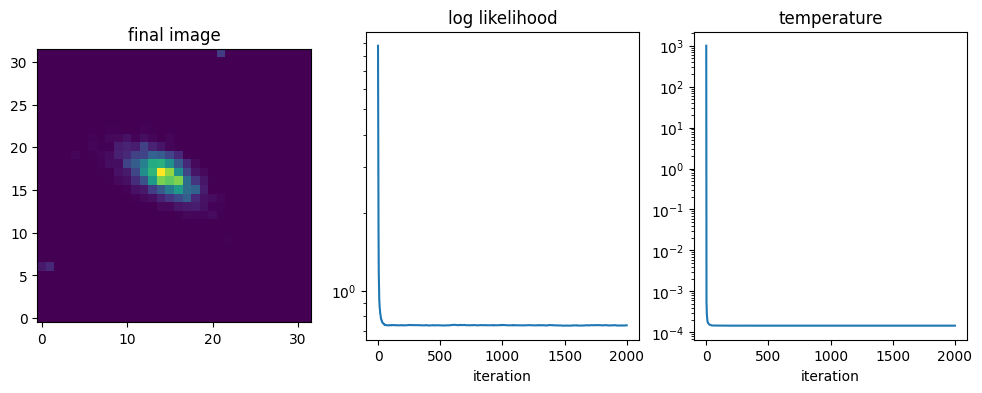

In [43]:
# fitter.make_matrix(specind, fibinds)

rc = fitter2.run(niter = 2000, radius = 20, plot_every = 5000)

In [ ]:
np.shape(fitter.mat)

In [ ]:
np.shape(fitter.mapmodel.normdata)

In [ ]:
1862/38

In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


Text(12.924809625449729, 19.785836503510563, 'disk')

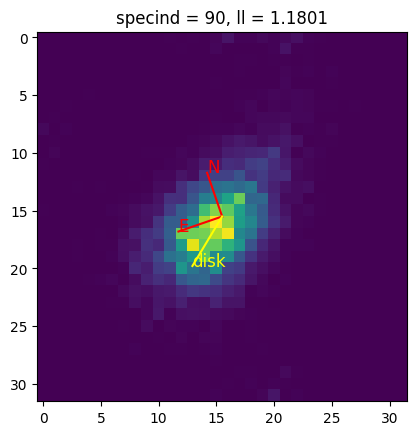

In [98]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 130
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 133
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

dx = -4*np.cos(np.radians(pad))
dy = -4*np.sin(np.radians(pad))
plt.plot([xc, xc+dx], [yc, yc+dy], 'r')
plt.text(xc+dx, yc+dy, 'N', color='r', fontsize=12)

plt.plot([xc, xc+dy], [yc, yc-dx], 'r')
plt.text(xc+dy, yc-dx, 'E', color='r', fontsize=12)

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:
plt.imshow(locs2image(rc.post_locs, rc.axis_len)) #,
#         extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
#         origin='upper')
# plt.axvline(0, color='white', alpha=0.3)
# plt.axhline(0, color='white', alpha=0.3)
plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
# plt.xlabel('x (mas)')
# plt.ylabel('y (mas)')

disk_PA = 131
pad = 71
xc, yc = 15.5, 15.5
dx_disk = -5*np.cos(np.radians(pad - disk_PA))
dy_disk = -5*np.sin(np.radians(pad - disk_PA))

plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


# disk_PA = 143
# pad = 71
# xc, yc = 15.5, 15.5
# dx_disk = -5*np.cos(np.radians(pad - disk_PA))
# dy_disk = -5*np.sin(np.radians(pad - disk_PA))

# plt.plot([xc, xc+dx_disk], [yc, yc+dy_disk], 'yellow')
# plt.text(xc+dx_disk, yc+dy_disk, 'disk', color='yellow', fontsize=12)


In [ ]:

for specind in np.arange(103, 112):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:

for specind in np.arange(112, 120):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:

for specind in np.arange(95, 103):
    fibinds = np.arange(38)

    fitter.prepare_data(specind, fibinds)
    fitter.make_matrix(specind, fibinds)
    
    rc = fitter.run(niter = 2000, radius = 10, plot_every = 5000)

    fig = plt.figure(figsize=(5,5))
    plt.imshow(locs2image(rc.post_locs, rc.axis_len),
            extent = (-image_fov/2, image_fov/2, -image_fov/2, image_fov/2),
            origin='upper')
    plt.axvline(0, color='white', alpha=0.3)
    plt.axhline(0, color='white', alpha=0.3)
    plt.title('specind = %d, ll = %.4f' % (specind, rc.current_ll))
    plt.xlabel('x (mas)')
    plt.ylabel('y (mas)')

    fig.savefig('results/specind_%d.png' % specind)
    plt.show()
    
    np.save('results/specind_%d.npy' % specind, locs2image(rc.post_locs, rc.axis_len))

In [ ]:
rc.current_ll

In [ ]:
rc.final_vec